In [111]:
pip install pandas matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [123]:
# Existence assertions
# # Every crash record occurred in a particular location.
# # Each crash record must have a highway number.
import pandas as pd

# Fetch the CSV file
file_path = "./crash_data.csv"
data = pd.read_csv(file_path)

# Filter records with Record Type == 1 for every Crash ID
data = data[data['Record Type'] == 1]

# # Assertion 1: Every crash record occurred in a particular location
# # Check for missing values in Latitude and Longitude columns
missing_location = data[['Latitude Degrees', 'Longitude Degrees']].isnull().any(axis=1).sum()
if missing_location == 0:
    print("Assertion 1: All crash records have location information.")
else:
    print(f"Assertion 1 violated: {missing_location} records do not have location information.")

# # Assertion 2: Each crash record must have a highway number
# # Check for missing or invalid values in Highway Number column
missing_highway = data['Highway Number'].isnull().sum()
invalid_highway = data['Highway Number'].isin(['', 0]).sum()
if missing_highway == 0 and invalid_highway == 0:
    print("Assertion 2: All crash records have a valid highway number.")
else:
    print(f"Assertion 2 violated: {missing_highway} records have missing highway numbers, and {invalid_highway} records have invalid highway numbers.")


Assertion 1: All crash records have location information.
Assertion 2: All crash records have a valid highway number.


In [124]:
# Limit assertions

# Check if every crash occurred during year 2019
invalid_years = data[data['Crash Year'] != 2019]

if len(invalid_years) == 0:
    print("Assertion: Every crash occurred during year 2019.")
else:
    print("Assertion violated: Some crashes occurred during years other than 2019.")
    print("Invalid records:")
    print(invalid_years[['Crash ID', 'Crash Year']])

Assertion: Every crash occurred during year 2019.


In [125]:
# Intra record Assertions

# Check if a crash record has a crash type, then it should have crash severity and collision type
missing_severity_collision = data[(data['Crash Type'].notnull()) & ((data['Crash Severity'].isnull()) | (data['Collision Type'].isnull()))]

if len(missing_severity_collision) == 0:
    print("Assertion: All the crash record has a crash type,crash severity and collision type.")
else:
    print("Assertion violated: Some crash records with crash type do not have crash severity or collision type.")
    print("Invalid records:")
    print(missing_severity_collision[['Crash ID', 'Crash Type', 'Crash Severity', 'Collision Type']])

# Check if it is valid types
# Check if Crash Severity is "2", "4", or "5"
valid_severity = data['Crash Severity'].isin(['2', '4', '5'])

# Check if Collision Type is in the range "0" to "9", "-", and "&"
valid_collision_type = data['Collision Type'].isin([str(i) for i in range(10)] + ['-', '&'])

# Check if Crash Type is in the range "A" to "J", "0" to "4", "6" to "9", and "&"
valid_crash_type = data['Crash Type'].isin([chr(i) for i in range(65, 74)] + [str(i) for i in range(10)] + ['&']) & (~data['Crash Type'].isin(['5']))

# Check if conditions are met for every record
invalid_records = data[~(valid_severity & valid_collision_type & valid_crash_type)]

if len(invalid_records) == 0:
    print("Assertion: Conditions for Crash Severity, Collision Type, and Crash Type are met.")
else:
    print("Assertion violated: Some records do not meet the conditions for Crash Severity, Collision Type, and Crash Type.")
    print("Invalid records:")
    print(invalid_records[['Crash ID', 'Crash Severity', 'Collision Type', 'Crash Type']])


Assertion: All the crash record has a crash type,crash severity and collision type.
Assertion violated: Some records do not meet the conditions for Crash Severity, Collision Type, and Crash Type.
Invalid records:
      Crash ID  Crash Severity  Collision Type  Crash Type
0      1809119             1.0             1.0         2.0
5      1809229             1.0             1.0         2.0
9      1809637             1.0             2.0         2.0
12     1810874             2.0             3.0         2.0
16     1812266             1.0             1.0         2.0
...        ...             ...             ...         ...
2716   1860371             2.0             3.0         5.0
2719   1860417             1.0             1.0         5.0
2724   1860427             2.0             3.0         5.0
2729   1860453             1.0             1.0         5.0
2734   1860771             1.0             1.0         5.0

[508 rows x 4 columns]


In [46]:
#Inter record assertions
data = pd.read_csv(file_path)
# Check if Driver Age is between 1 and 13
age_between_01_13 = (data['Age'] >= 1) & (data['Age'] <= 13)

# Check if Driver License Status is "0"
valid_license_status_01_13 = data.loc[age_between_01_13, 'Driver License Status'] == '0'

# Check if conditions are met for every record
invalid_records = data[age_between_01_13 & ~valid_license_status_01_13]

if len(invalid_records) == 0:
    print("Assertion: Conditions for driver age between 01 and 13 and driver license status '0' are met.")
else:
    print("Assertion violated: Some records do not meet the conditions for driver age and driver license status.")
    print("Invalid records:")
    print(invalid_records[['Participant ID', 'Age', 'Driver License Status']])

    
# Check if Participant's Injury Severity is 7
injury_severity_7 = data['Injury Severity'] == 7

# Check if Participant Age is between 1 and 4
valid_age_01_04 = (data['Age'] >= 1) & (data['Age'] <= 4)

# Check if conditions are met for every record
invalid_records = data[injury_severity_7 & ~valid_age_01_04]

if len(invalid_records) == 0:
    print("Assertion: Participant's Injury Severity is 7, the Participant Age is between 01 and 04.")
else:
    print("Assertion violated: Some records do not meet the conditions for Participant's Injury Severity and Age.")
    print("Invalid records:")
    print(invalid_records[['Participant ID', 'Injury Severity', 'Age']])

# Check if Age is a two-digit numeric between 00 and 99 inclusive
valid_age_format = data['Age'].astype(str).str.match(r'^\d{2}$')

# Check if conditions are met for every record
invalid_records = data[~valid_age_format]

if len(invalid_records) == 0:
    print("Assertion: Age is a two-digit numeric between 00 and 99 inclusive.")
else:
    print("Assertion violated: Some records do not meet the condition for Age format.")
    print("Invalid records:")
    print(invalid_records[['Crash ID','Record Type','Participant ID', 'Age']])



Assertion violated: Some records do not meet the conditions for driver age and driver license status.
Invalid records:
      Participant ID  Age  Driver License Status
2          3887884.0  6.0                    NaN
4          3887885.0  2.0                    1.0
7          3888073.0  2.0                    0.0
11         3888766.0  2.0                    1.0
14         3890872.0  2.0                    NaN
...              ...  ...                    ...
2728       3990896.0  9.0                    NaN
2731       3990937.0  9.0                    NaN
2733       3990938.0  9.0                    NaN
2736       3991482.0  9.0                    NaN
2738       3991483.0  9.0                    NaN

[1174 rows x 3 columns]
Assertion violated: Some records do not meet the conditions for Participant's Injury Severity and Age.
Invalid records:
      Participant ID  Injury Severity  Age
2147       3977372.0              7.0  6.0
Assertion violated: Some records do not meet the condition for

In [108]:
#Summary Assertions
# Filter records with Record Type == 1 for every Crash ID
data = data[data['Record Type'] == 1]
# Calculate the total number of crashes
total_crashes = len(data)
print(total_crashes)
# Define the range (e.g., 1000-5000)
range_start = 100
range_end = 1000

# Check if the total number of crashes falls within the specified range
if range_start <= total_crashes <= range_end:
    print(f"Assertion: Total number of crashes ({total_crashes}) falls within the range of {range_start} to {range_end}.")
else:
    print(f"Assertion violated: Total number of crashes ({total_crashes}) does not fall within the range of {range_start} to {range_end}.")

# Filter records where Crash Severity indicates a fatal crash
fatal_crashes = data[data['Crash Severity'] == 2]

# Check if there are any fatal crashes where no participant was coded with a fatal injury
no_fatal_injury = fatal_crashes[fatal_crashes['Total Fatality Count'] == 0]

if len(no_fatal_injury) == 0:
    print("Assertion: For Crash Severity indicating a fatal crash, at least one participant was coded with a fatal injury.")
else:
    print("Assertion violated: Some records indicate a fatal crash, but no participant was coded with a fatal injury.")
    print("Invalid records:")
    print(no_fatal_injury[['Crash ID','Crash Severity','Total Fatality Count']])


508
Assertion: Total number of crashes (508) falls within the range of 100 to 1000.
Assertion violated: Some records indicate a fatal crash, but no participant was coded with a fatal injury.
Invalid records:
      Crash ID  Crash Severity  Total Fatality Count
12     1810874             2.0                   0.0
342    1834858             2.0                   0.0
347    1835060             2.0                   0.0
350    1835061             2.0                   0.0
353    1835182             2.0                   0.0
358    1835197             2.0                   0.0
402    1835332             2.0                   0.0
2285   1853585             2.0                   0.0
2470   1854731             2.0                   0.0
2475   1854794             2.0                   0.0
2495   1854987             2.0                   0.0
2500   1854997             2.0                   0.0
2509   1855361             2.0                   0.0
2519   1855571             2.0                   0

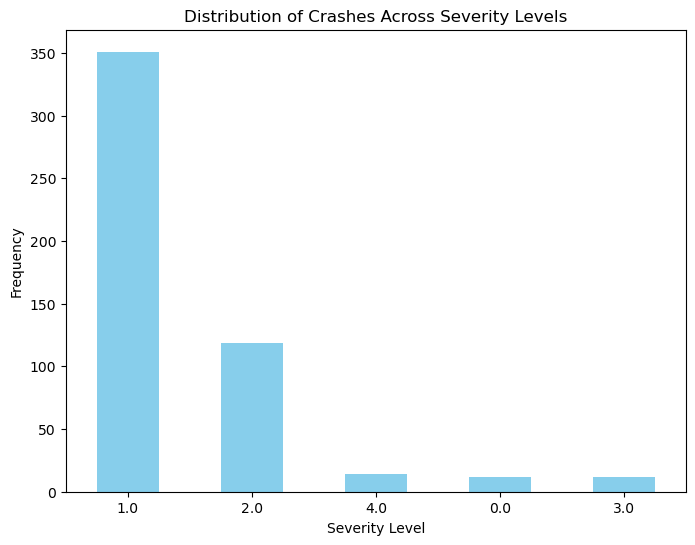

In [122]:
import matplotlib.pyplot as plt
data = pd.read_csv(file_path)
data = data[data['Record Type'] == 1]
# Count the frequency of each severity level
severity_counts = data['Crash Severity'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crashes Across Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


508


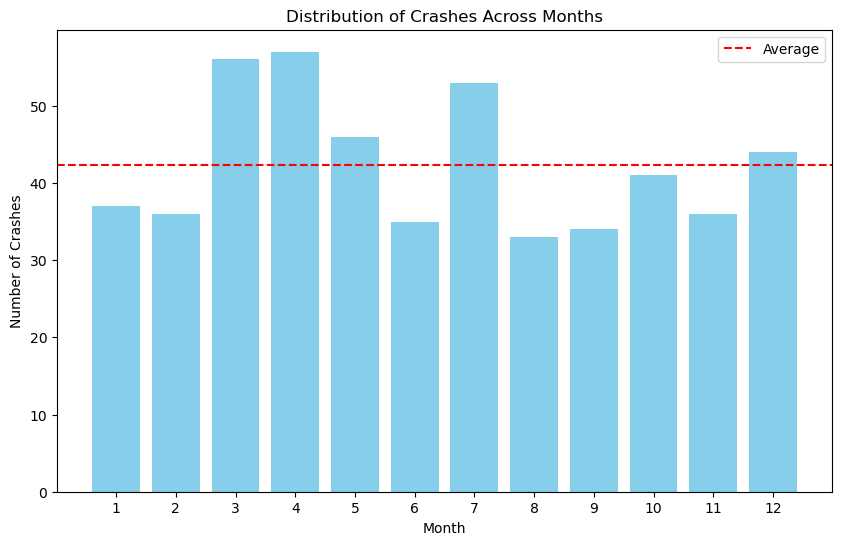

In [117]:
import matplotlib.pyplot as plt

data = pd.read_csv(file_path)
data = data[data['Record Type'] == 1]

# Calculate average number of crashes per month
average_crashes_per_month = data.groupby('Crash Month')['Crash ID'].count().mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(data['Crash Month'].unique(), data.groupby('Crash Month')['Crash ID'].count(), color='skyblue')
plt.axhline(y=average_crashes_per_month, color='red', linestyle='--', label='Average')
plt.title('Distribution of Crashes Across Months')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(data['Crash Month'].unique())
plt.legend()
plt.show()

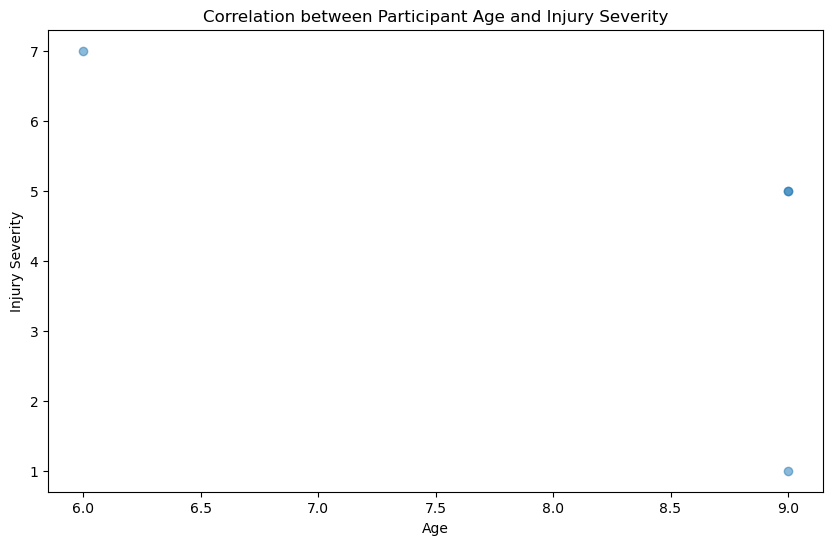

In [121]:
#statistical distribution assertions

import matplotlib.pyplot as plt
data = pd.read_csv(file_path)

# Convert Age to numeric type
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop rows with missing values in Age or Injury Severity
data.dropna(subset=['Age', 'Injury Severity'], inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Injury Severity'].astype(int), alpha=0.5)
plt.title('Correlation between Participant Age and Injury Severity')
plt.xlabel('Age')
plt.ylabel('Injury Severity')
plt.show()